In [1]:
from PIL import Image 
from matplotlib import pyplot as plt
import glob
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

## 훈련셋 라벨링 및 정규화

In [2]:
def load_data(img_path, number_of_data=1812):  # 데이터 갯수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력값을 0~1사이로 정규화 해줌

print("x_train shape: {}".format(x_train.shape)) # (데이터갯수, 이미지 x축크기, 이미지 y축크기, 채널수=분류하고자하는 클래스의 갯수)
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1812 입니다.
x_train shape: (1812, 28, 28, 3)
y_train shape: (1812,)


## 훈련셋 라벨확인

라벨:  0


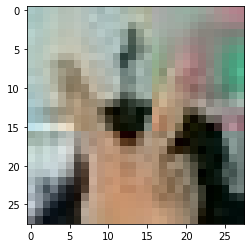

In [3]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 모델만들기

In [4]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) # 3채널
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 최종분류의 클래스가 3개이기때문에 3

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

## 훈련셋 네트워크 설정

In [12]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 분류의 클래스가 3개이기때문에 3채널
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))


Before Reshape - x_train_norm shape: (1812, 28, 28, 3)
After Reshape - x_train_reshaped shape: (1812, 28, 28, 3)


## 모델학습

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10) # 10회 학습

Before Reshape - x_train_norm shape: (1812, 28, 28, 3)
After Reshape - x_train_reshaped shape: (1812, 28, 28, 3)
Epoch 1/10
57/57 [==============================] - 3s 4ms/step - loss: 1.0582 - accuracy: 0.4636
Epoch 2/10
57/57 [==============================] - 0s 3ms/step - loss: 0.8447 - accuracy: 0.6462
Epoch 3/10
57/57 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7765
Epoch 4/10
57/57 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.8411
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8924
Epoch 6/10
57/57 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.9216
Epoch 7/10
57/57 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9360
Epoch 8/10
57/57 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9531
Epoch 9/10
57/57 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.9603
Epoch

## 검증셋 라벨링 및 정규화

In [15]:
def load_data(img_path_test, number_of_data=295):  # 데이터 갯수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path_test+'/scissor1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path_test+'/rock1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path_test+'/paper1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


image_dir_path_test = os.getenv("HOME") + "/aiffel/test"
(x_test, y_test)=load_data(image_dir_path_test)
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape)) # (데이터갯수, 이미지 x축크기, 이미지 y축크기, 채널수=분류하고자하는 클래스의 갯수)
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 295 입니다.
x_test shape: (295, 28, 28, 3)
y_test shape: (295,)


## 검증셋 라벨확인

라벨:  0


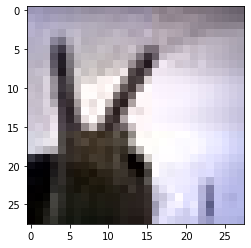

In [8]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

## 검증셋 네트워크설정

In [13]:
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)  # (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 분류의 클래스가 3개이기때문에 3채널
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))


Before Reshape - x_test_norm shape: (295, 28, 28, 3)
After Reshape - x_test_reshaped shape: (295, 28, 28, 3)


## 테스트셋으로 정확도 출력

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 4.2988 - accuracy: 0.4983
test_loss: 4.298758506774902 
test_accuracy: 0.498305082321167
